<a href="https://colab.research.google.com/github/henriquebap/Machine_Learning_HB/blob/main/EDA_Airline_flights_Routes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
### **Objective**
- The goal is to predict airfare prices based on various factors such as distance, the number of passengers, the airports involved, and carrier information. By understanding the relationships between these features and the airfare, we can create a model that helps to forecast airfare, which could be useful for consumers, airlines, and travel agencies.

## Data Features



Here’s a list of the column names along with their meanings based on the context of the dataset:

---

- **tbl**: Table identifier, likely indicates the source table for the data.
- **Year**: The year in which the data was recorded.
- **quarter**: The quarter of the year (1 = Jan-Mar, 2 = Apr-Jun, 3 = Jul-Sep, 4 = Oct-Dec).
- **citymarketid_1**: Unique identifier for the first city market.
- **citymarketid_2**: Unique identifier for the second city market.
- **city1**: Name of the first city or metropolitan area in the airport pair.
- **city2**: Name of the second city or metropolitan area in the airport pair.
- **airportid_1**: Unique identifier for the first airport.
- **airportid_2**: Unique identifier for the second airport.
- **airport_1**: Name of the first airport.
- **airport_2**: Name of the second airport.
- **nsmiles**: Nautical miles from the departure airport to the arrival airport.
- **passengers**: The number of passengers traveling between the two airports.
- **fare**: Average airfare paid by passengers between the two airports.
- **carrier_lg**: The code of the largest carrier (by market share) on this route.
- **large_ms**: Market share percentage of the largest carrier on this route.
- **fare_lg**: Average fare paid on this route when flying with the largest carrier.
- **carrier_low**: The code of the low-cost carrier with the most passengers on this route.
- **lf_ms**: Market share percentage of the low-cost carrier on this route.
- **fare_low**: Average fare paid on this route when flying with the low-cost carrier.
- **Geocoded_City1**: Geocoded information for the first city (latitude/longitude).
- **Geocoded_City2**: Geocoded information for the second city (latitude/longitude).
- **tbl1apk**: Unique ID (Primary Key)

# Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = '/content/Consumer_Airfare_Report__Table_1a_-_All_U.S._Airport_Pair_Markets_20240712.csv'

In [3]:
df = pd.read_csv(data)

## Data Summary and Structure

In [4]:
df.tail()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,NaN,NaN,202411541212953TYSLGA
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,NaN,NaN,202411541211697TYSFLL
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,NaN,NaN,202411541213303TYSMIA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,NaN,NaN,202411541214112TYSPIE
245954,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,15304,TYS,...,330.15,AA,0.5212,288.38,AA,0.5212,288.38,NaN,NaN,202411541215304TYSTPA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

Missing Data Analysis

In [6]:
df.isnull().sum()

,0
tbl,0
Year,0
quarter,0
citymarketid_1,0
citymarketid_2,0
city1,0
city2,0
airportid_1,0
airportid_2,0
airport_1,0


In [7]:
print(df.describe())

                Year        quarter  citymarketid_1  citymarketid_2  \
count  245955.000000  245955.000000   245955.000000   245955.000000   
mean     2008.524124       2.479153    31556.430201    32180.117086   
std         8.703364       1.122149     1089.872880     1232.464184   
min      1993.000000       1.000000    30135.000000    30189.000000   
25%      2001.000000       1.000000    30721.000000    30994.000000   
50%      2008.000000       2.000000    31423.000000    32211.000000   
75%      2016.000000       3.000000    32467.000000    33192.000000   
max      2024.000000       4.000000    35412.000000    35628.000000   

         airportid_1    airportid_2        nsmiles     passengers  \
count  245955.000000  245955.000000  245955.000000  245955.000000   
mean    12437.099986   13249.889525    1189.812319     299.476795   
std      1431.665257    1425.810159     703.143472     511.389486   
min     10135.000000   10466.000000     109.000000       0.000000   
25%     11193.0

Dropping columns with a significant amount of missing data

In [8]:
df = df.drop(['Geocoded_City1', 'Geocoded_City2'], axis=1)

Filling missing values in other columns with appropriate strategies


In [9]:
df['carrier_lg'].fillna('Unknown', inplace=True)
df['large_ms'].fillna(df['large_ms'].mean(), inplace=True)
df['fare_lg'].fillna(df['fare_lg'].mean(), inplace=True)
df['carrier_low'].fillna('Unknown', inplace=True)
df['lf_ms'].fillna(df['lf_ms'].mean(), inplace=True)
df['fare_low'].fillna(df['fare_low'].mean(), inplace=True)

Removing special characters from column names


In [10]:
df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '', regex=True) # this mean that will Remove all characters except the characters and Numbers :
df

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,202131014014107ABQPHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,665,207,278.70,DL,0.7503,287.44,AA,0.2359,248.46,202411541212953TYSLGA
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,724,277,148.69,G4,0.8255,114.45,G4,0.8255,114.45,202411541211697TYSFLL
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,724,70,330.19,AA,0.8057,321.92,AA,0.8057,321.92,202411541213303TYSMIA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,550,178,95.65,G4,1.0000,95.65,G4,1.0000,95.65,202411541214112TYSPIE


Checking missing values

In [11]:
df.isna().sum()

,0
tbl,0
Year,0
quarter,0
citymarketid_1,0
citymarketid_2,0
city1,0
city2,0
airportid_1,0
airportid_2,0
airport_1,0


## Exploratory Data Analysis (EDA)
- The purpose of EDA is to gain insights into the data, identify patterns, detect anomalies, and establish relationships between variables. This step is crucial to ensure that the data is ready for modeling and that the model we build will be robust.
---


#### Univariate analysis:
Distribution of fares

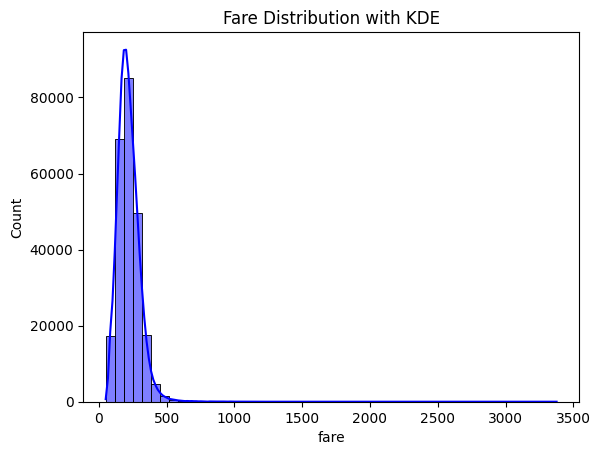

In [12]:
sns.histplot(df['fare'], bins=50, kde=True, color='blue')
plt.title('Fare Distribution with KDE')
plt.show()


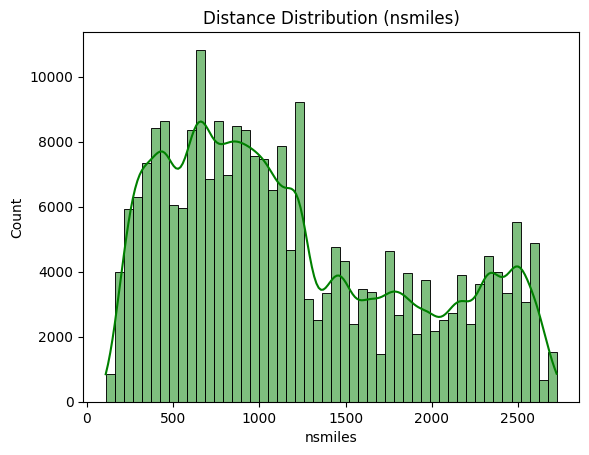

In [13]:
sns.histplot(df['nsmiles'], bins=50, kde=True, color='green')
plt.title('Distance Distribution (nsmiles)')
plt.show()


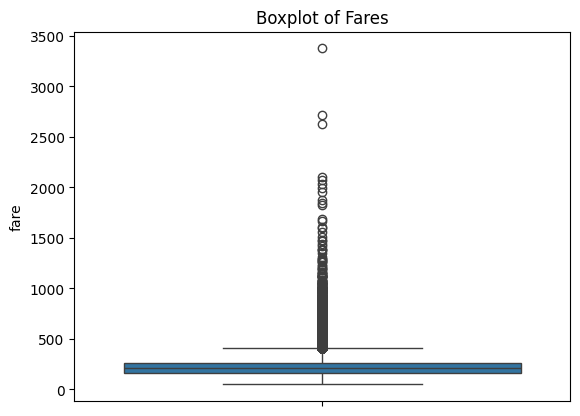

In [14]:
sns.boxplot(y=df['fare'])
plt.title('Boxplot of Fares')
plt.show()


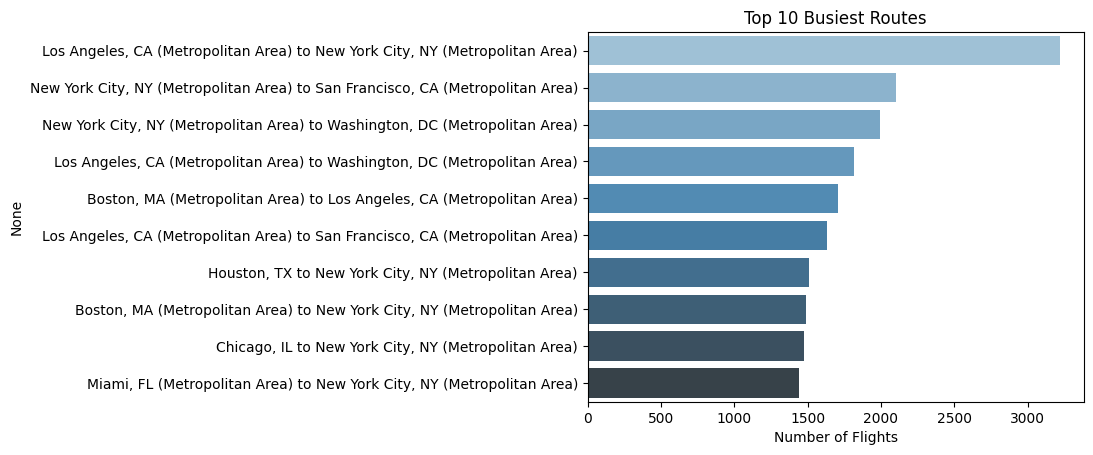

In [15]:
# Countplot for the top 10 busiest routes (city1 to city2)
top_routes = df.groupby(['city1', 'city2']).size().sort_values(ascending=False).head(10)

# Combine city1 and city2 into a single string
top_routes.index = top_routes.index.map(lambda x: f"{x[0]} to {x[1]}")

# Plotting
sns.barplot(x=top_routes.values, y=top_routes.index, palette="Blues_d")
plt.xlabel('Number of Flights')
plt.title('Top 10 Busiest Routes')
plt.show()


# Bivariate analysis:

Fares vs. Distance (nsmiles)


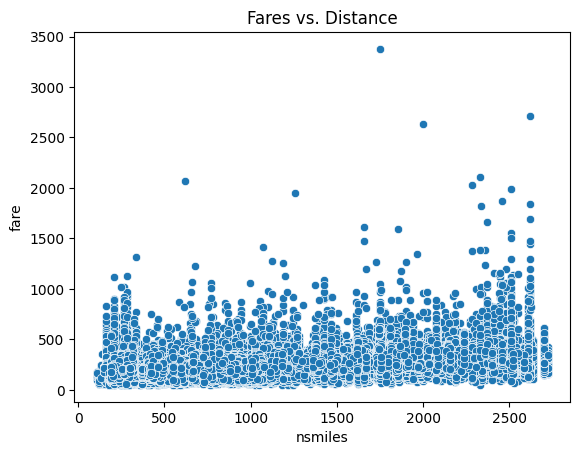

In [16]:
sns.scatterplot(x='nsmiles', y='fare', data=df)
plt.title('Fares vs. Distance')
plt.show()

Scatterplot: Fare vs. Distance (nsmiles)


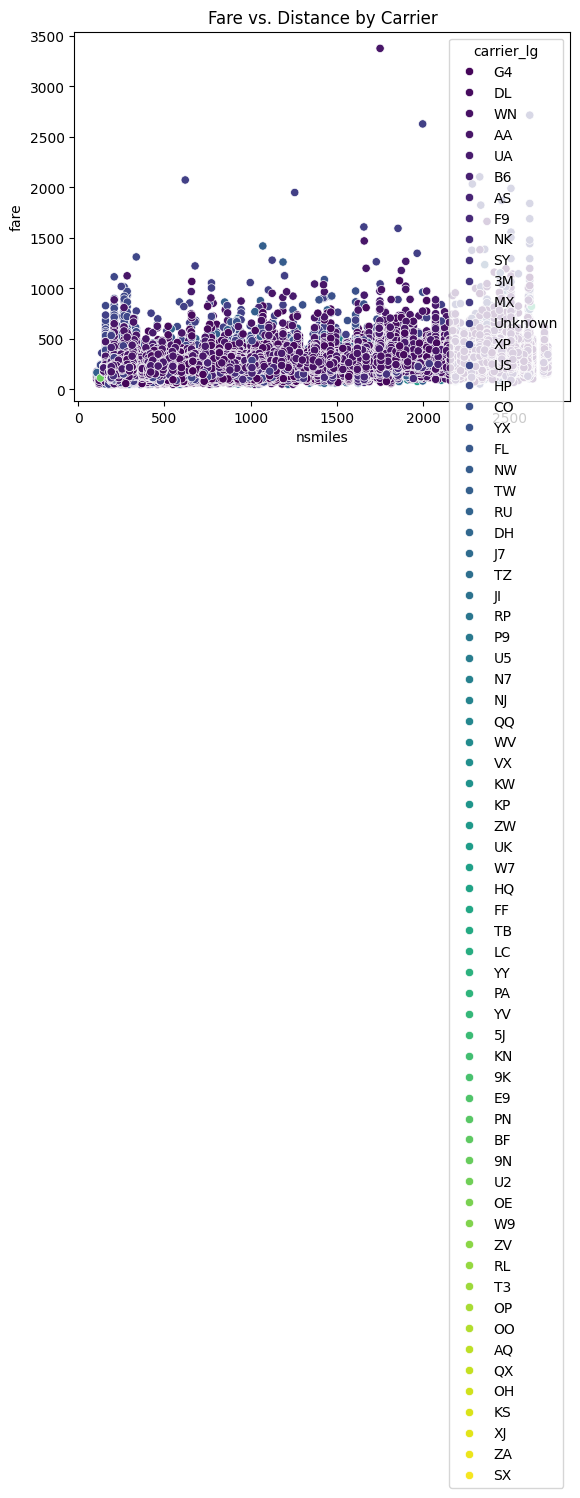

In [17]:
sns.scatterplot(x='nsmiles', y='fare', data=df, hue='carrier_lg', palette='viridis')
plt.title('Fare vs. Distance by Carrier')
plt.show()

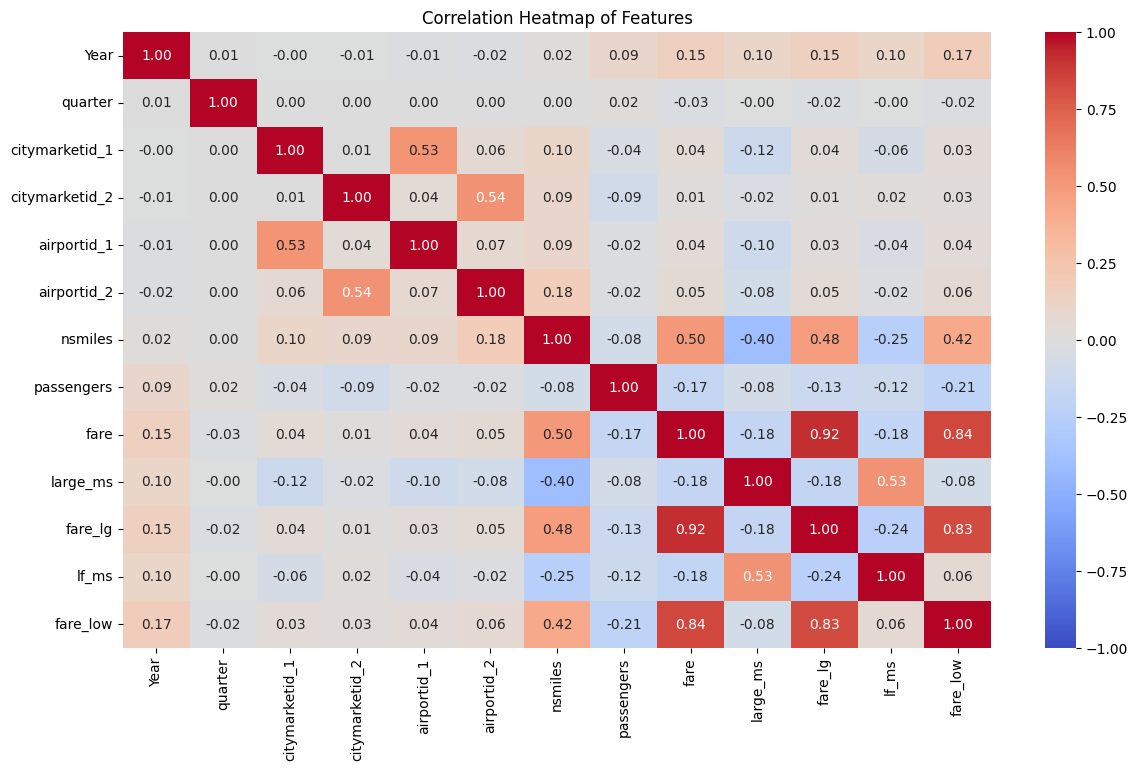

In [18]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap with detailed annotation
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()


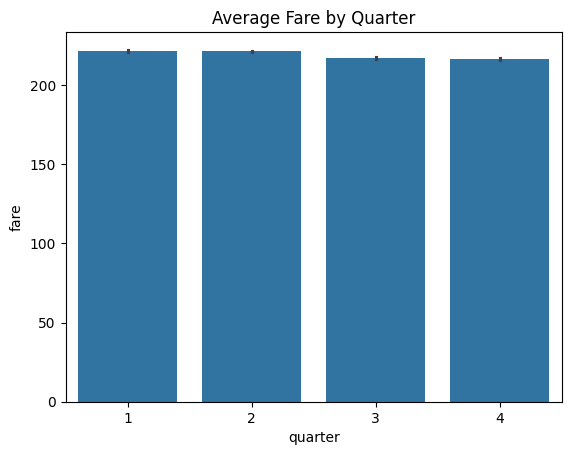

In [19]:
# Bar plot: Average fare by quarter
sns.barplot(x='quarter', y='fare', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Average Fare by Quarter')
plt.show()

# Multivariate Analysis: Interaction Insights

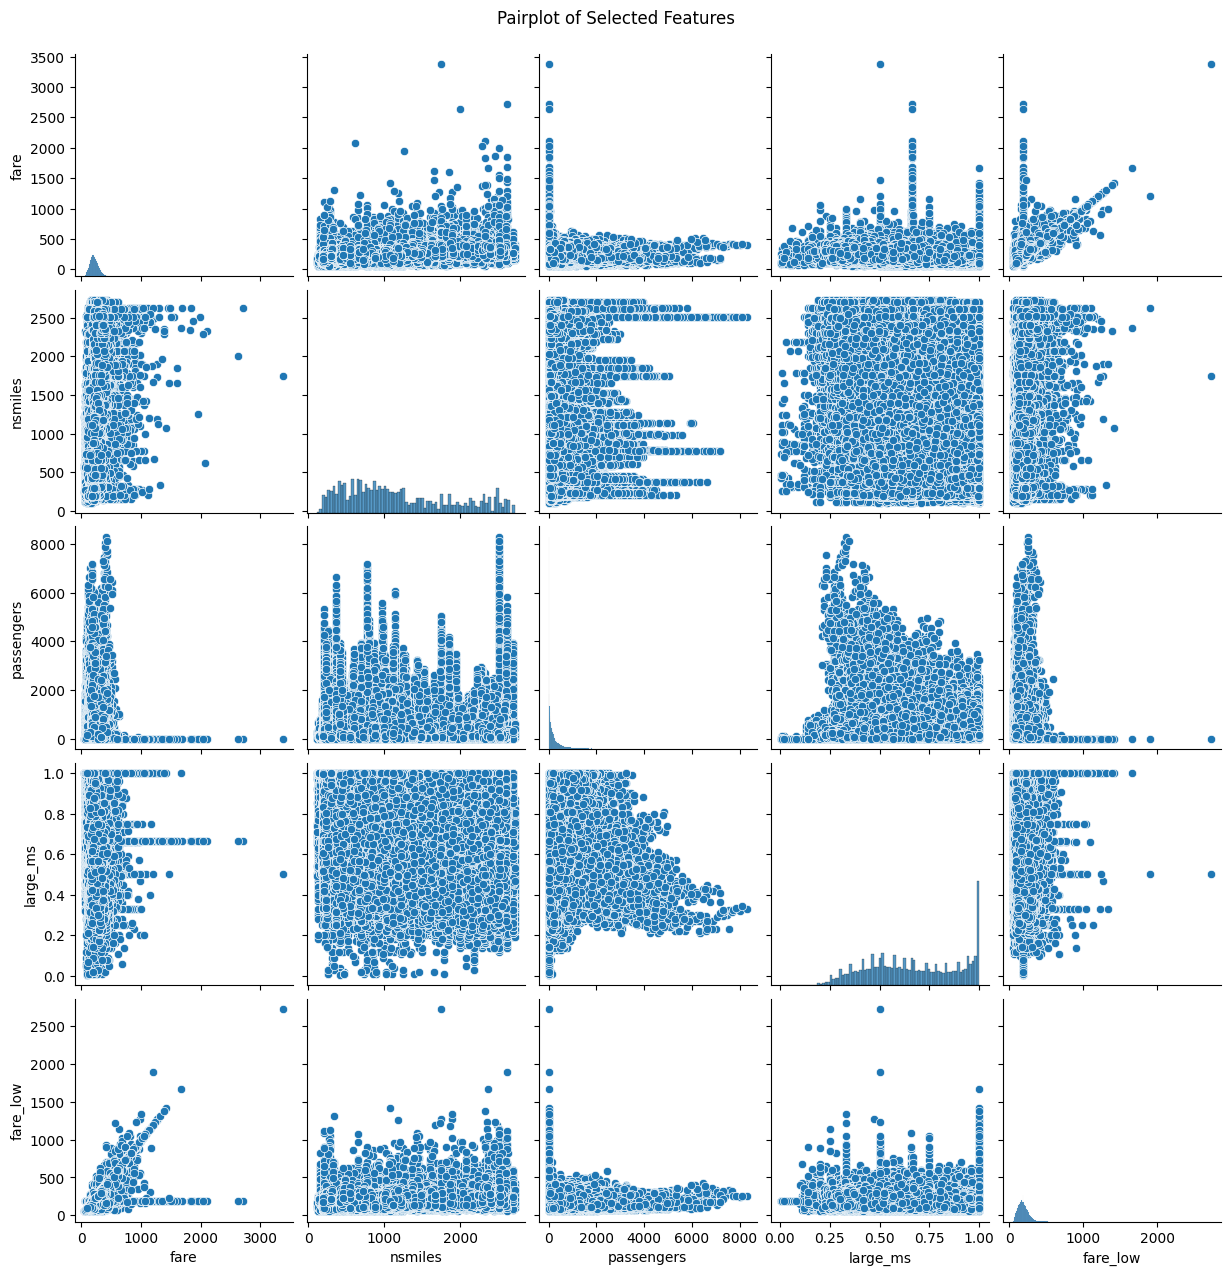

In [20]:
# Pairplot to visualize relationships between selected features
sns.pairplot(df[['fare', 'nsmiles', 'passengers', 'large_ms', 'fare_low']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

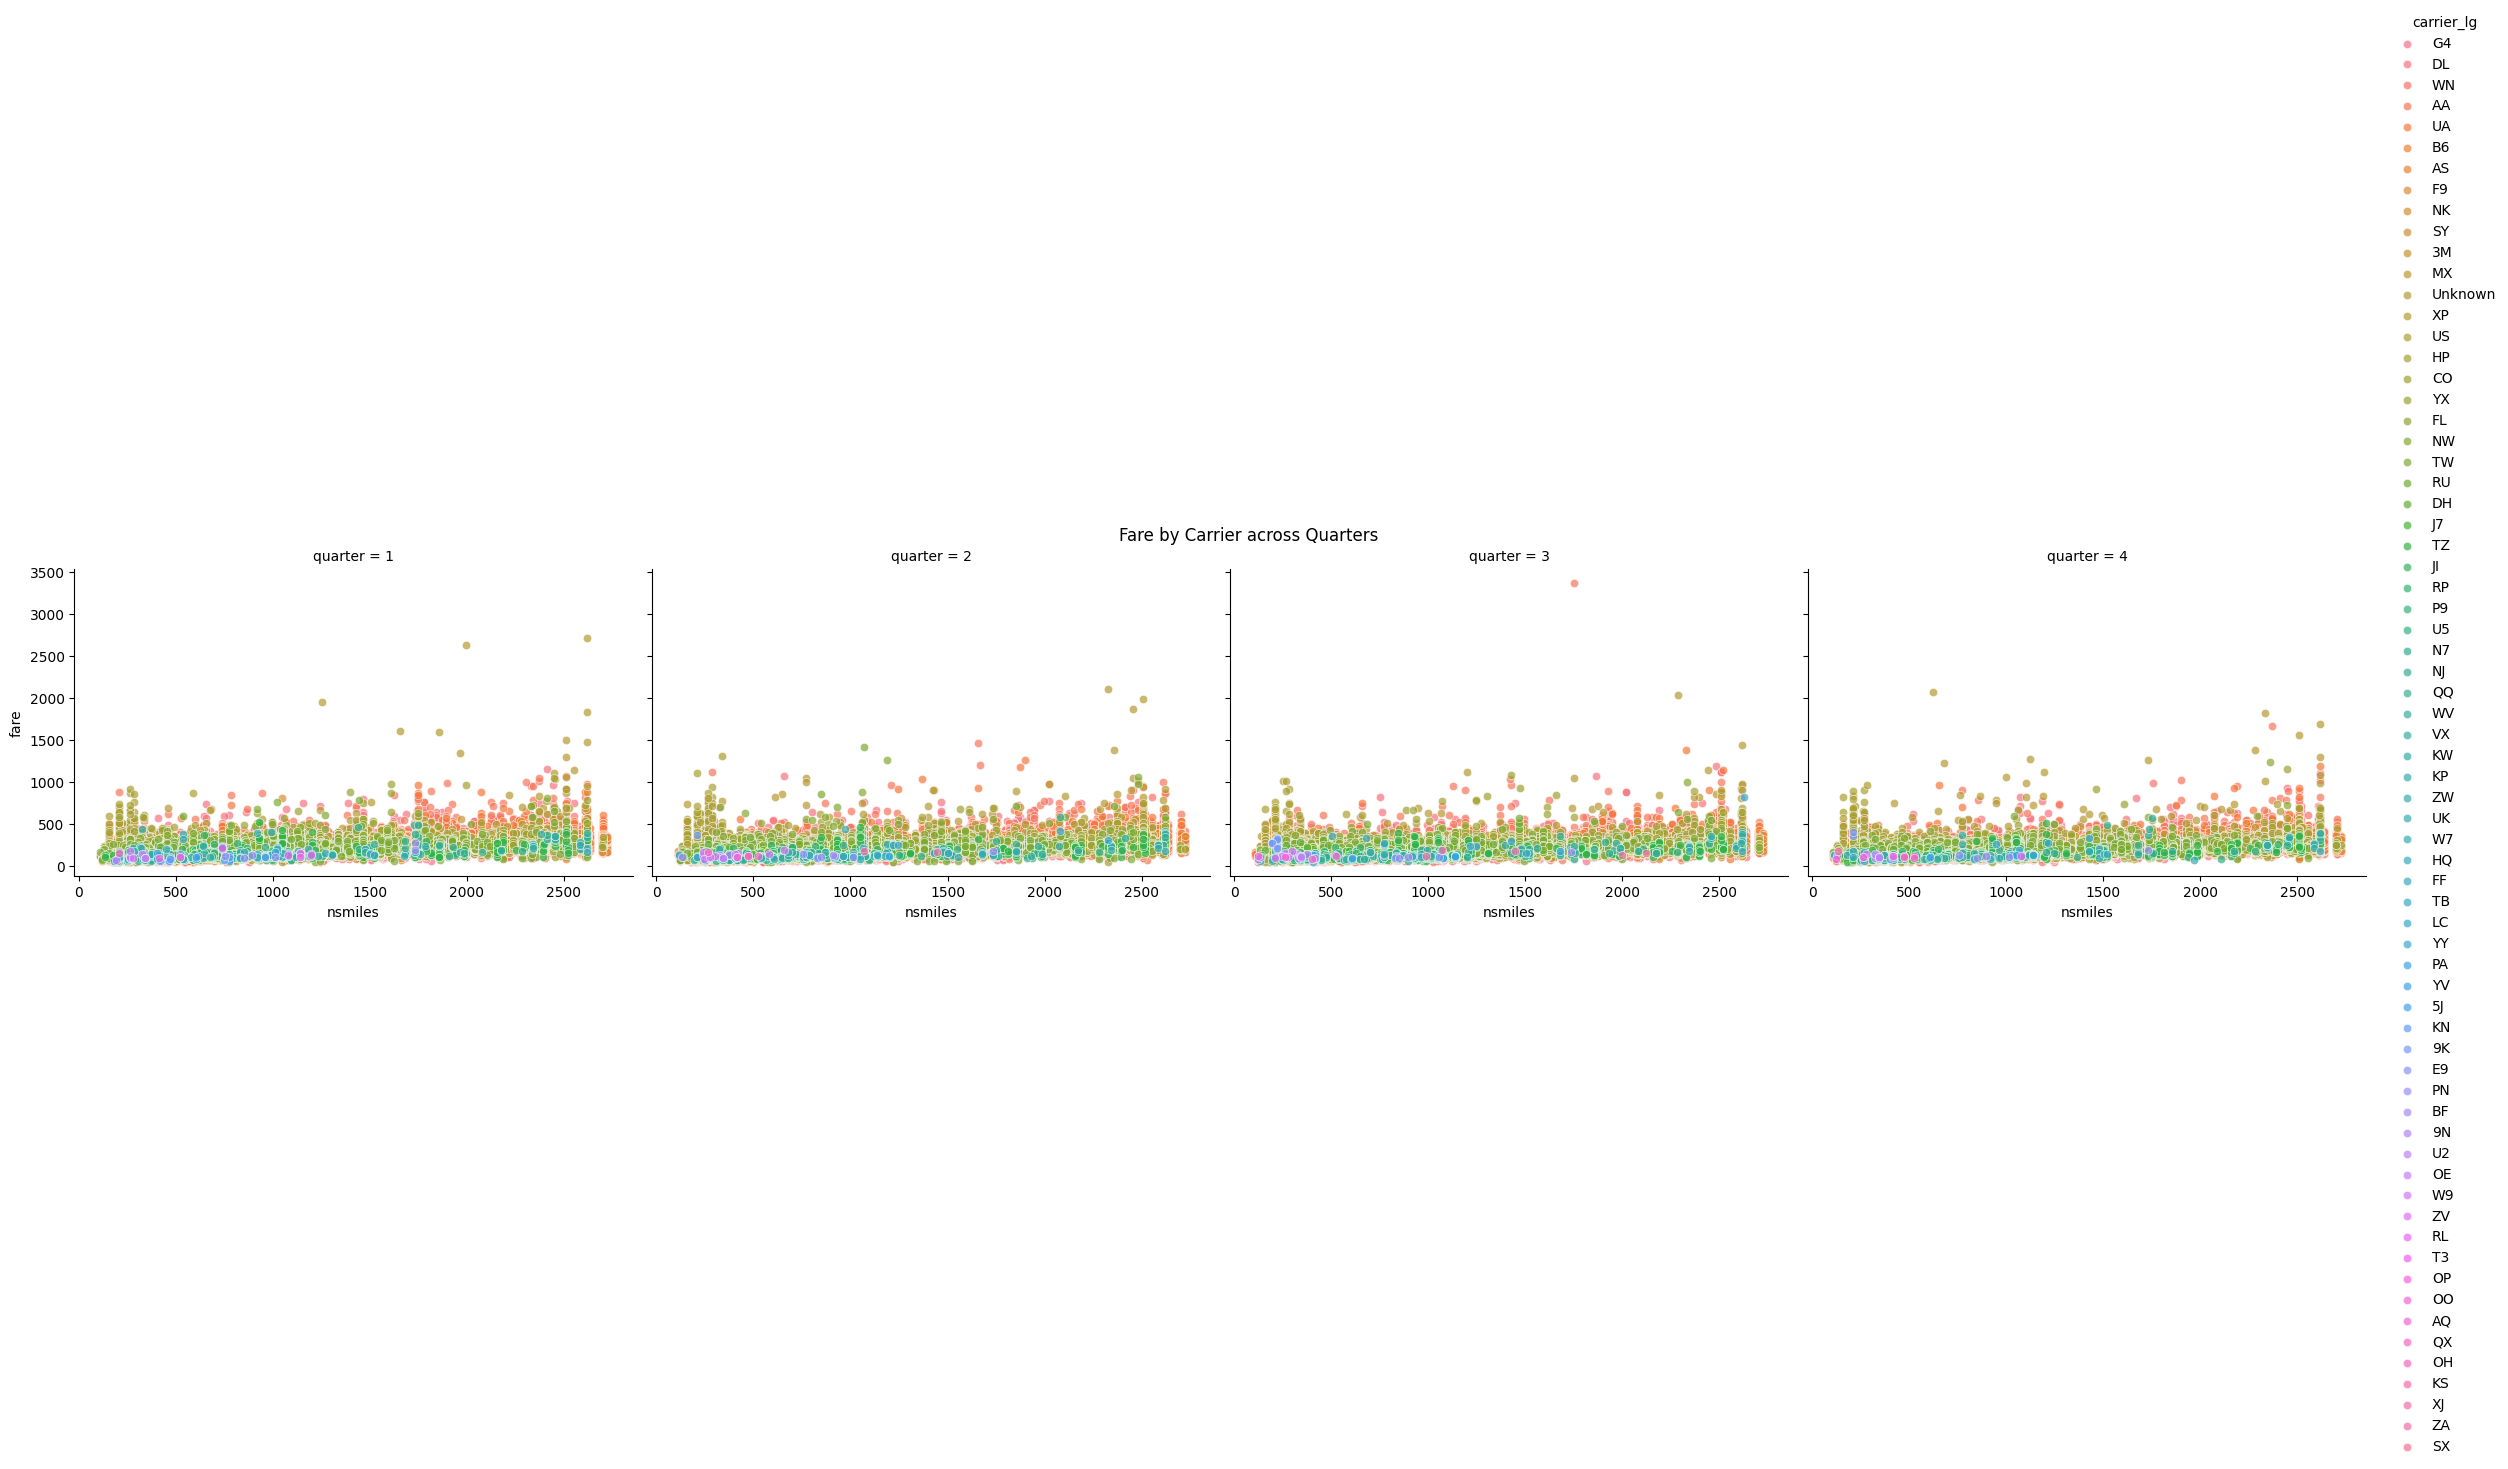

In [21]:
# FacetGrid: Fare by carrier across different quarters
g = sns.FacetGrid(df, col="quarter", hue="carrier_lg", height=4, aspect=1.5)
g.map(sns.scatterplot, "nsmiles", "fare", alpha=.7)
g.add_legend()
plt.suptitle('Fare by Carrier across Quarters', y=1.02)
plt.show()

## Conclusion of EDA
The exploratory data analysis (EDA) has revealed that the dataset is quite complex due to a significant amount of unrelated or noisy data, which makes it challenging to extract meaningful patterns. Despite these difficulties, I will proceed to develop a model aimed at predicting airline fares. The EDA has provided a foundational understanding, allowing for careful consideration in feature engineering and selection to enhance model accuracy.

# Modeling Phase

---

### Feature Engineering
Creating new features

In [23]:
df['price_per_mile'] = df['fare'] / df['nsmiles']

In [22]:
df = df.drop(['tbl', 'tbl1apk'], axis=1)

## Preparing Data for Modeling

Encoding Categorical Variables & Splitting the Data

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [25]:
# Encoding categorical variables
le = LabelEncoder()
df['carrier_lg'] = le.fit_transform(df['carrier_lg'])
df['carrier_low'] = le.fit_transform(df['carrier_low'])

# Splitting the data
X = df.drop('fare', axis=1)
y = df['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
categorical_columns = X_train.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['city1', 'city2', 'airport_1', 'airport_2'], dtype='object')


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# One-hot encode the categorical variables with unknown handling
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_columns)], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)


# Modeling
Model Training and Evaluation

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [29]:
# Training a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression RMSE:', mean_squared_error(y_test, y_pred_lr, squared=False))

Linear Regression RMSE: 27.757901695542657


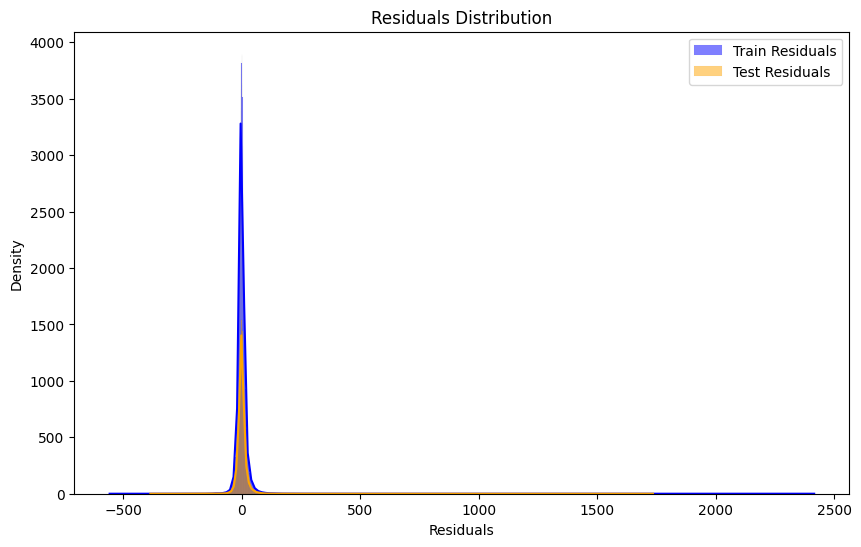

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your actual and predicted values
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, kde=True, label='Train Residuals', color='blue')
sns.histplot(test_residuals, kde=True, label='Test Residuals', color='orange')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()


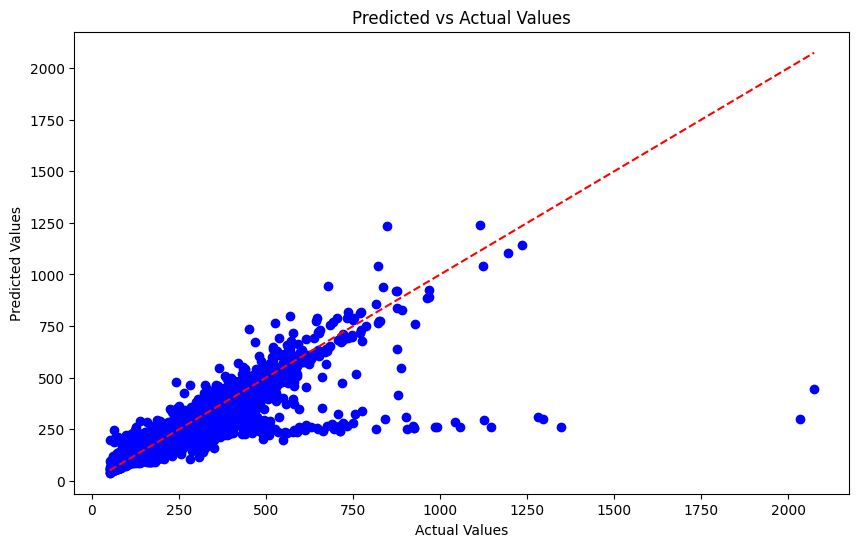

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [ ]:
# # Training a Random Forest model
# rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)
# print('Random Forest RMSE:', mean_squared_error(y_test, y_pred_rf, squared=False))

### Next Steps:
- **Feature Engineering:** Refine the dataset by removing unrelated features and exploring interactions between variables. Consider domain-specific knowledge to create new features that may better capture the underlying patterns in fare prediction.
- **Model Tuning:** Explore more sophisticated models such as Random Forest, Gradient Boosting Machines, or Neural Networks. Tuning hyperparameters for the chosen models may also improve performance.
- **Cross-Validation:** Implement cross-validation to assess the model's stability and generalization to unseen data.
- **Handling Outliers:** Investigate outliers in the fare data and determine whether they should be removed or adjusted, as they might be significantly impacting the model's performance.

# Conclusion

Predicting airline fares is a particularly challenging task, as evidenced by the initial Linear Regression model's RMSE of 27.76. The inherent complexity of the data, with its numerous unrelated variables and potential noise, further complicates the prediction. However, by carefully refining the data, engineering relevant features, and experimenting with more advanced models, it is possible to improve the model's predictive power. This journey emphasizes the importance of a thorough understanding of both the data and the domain to overcome the challenges in fare prediction.

---

**Potential Uses of the Airline Fare Prediction Model**
- In addition to the direct application of predicting airline fares, this model and the insights derived from the data can be leveraged in several valuable ways:

**Travel Demand Analysis:**

- By examining fare trends and passenger numbers across different routes and time periods, businesses and airlines can gain insights into travel demand. This analysis can help identify the most popular routes, as well as seasonal variations in passenger traffic, enabling better planning and resource allocation.

**Market Research:**

- Airlines and travel companies can use the fare prediction model to analyze the competitive landscape on specific routes. Understanding how competitors price their tickets can help airlines adjust their pricing strategies to maximize profitability while remaining competitive.

**Route Optimization:**

- The model can be instrumental in helping airlines evaluate the performance of existing routes. By identifying routes with high passenger demand or potential underutilized routes, airlines can optimize their operations. This might include adding new routes or increasing capacity on high-demand routes to better serve customers.

**Business Intelligence:**

- Beyond the airline industry, businesses can use the insights from this data to understand travel patterns relevant to their sector. For example, a company looking to expand its operations into new markets might analyze travel data to identify regions with high business travel activity, allowing for more informed decision-making regarding new office locations or market entries.

---


These potential applications highlight the broader impact that a well-developed fare prediction model can have across various sectors, not just within the airline industry. The ability to accurately predict fares, combined with a deep understanding of the underlying data, can drive strategic decisions and foster competitive advantages in multiple areas.


Dataset Link - [DataSet Link](https://www.kaggle.com/datasets/oleksiimartusiuk/all-airline-fight-routes-in-the-us/data)

# Contato
- **LinkedIn** : [Henrique Baptista](https://www.linkedin.com/in/henrique-baptista777/)
- **GitHub** : [henriquebap](https://github.com/henriquebap)
- **Email** : [henriquebaptista2003@gmail.com](mailto:henriquebaptista2003@gmail.com)